Background : Mental health issues have become one of the most important concerns for teenagers today, so how to determine whether a teenager has potential psychological problems has become popular.

Objective: To determine whether a person has potential mental health problems through a questionnaire (of course, we cannot simply ask the respondents whether they have mental illness)

Methods: First, we need to understand the background knowledge of the yrbss dataset, know the meaning of each variable in the dataset, and then visualize the dataset; second, we want to investigate with as few questions as possible, so we need to perform data cleaning on the yrbss dataset, i.e., find the most relevant set of features; finally, we need to build a suitable model to predict whether a person has an underlying mental illness.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
%config InlineBackend.figure_format ='retina'

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
df = pd.read_csv('yrbss_districts_2019.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393419 entries, 0 to 393418
Columns: 151 entries, sitecode to qtransgender
dtypes: float64(148), object(3)
memory usage: 453.2+ MB


In [5]:
df.columns

Index(['sitecode', 'sitename', 'sitetype', 'sitetypenum', 'year', 'survyear',
       'weight', 'stratum', 'PSU', 'record',
       ...
       'qwenthungry', 'qmusclestrength', 'qsunscreenuse', 'qindoortanning',
       'qsunburn', 'qconcentrating', 'qcurrentasthma', 'qwheresleep',
       'qspeakenglish', 'qtransgender'],
      dtype='object', length=151)

## Data Visualization

In [6]:
df.age.value_counts()

5.0    103593
4.0     99537
6.0     88325
3.0     53282
7.0     43571
2.0      2866
1.0      1209
Name: age, dtype: int64

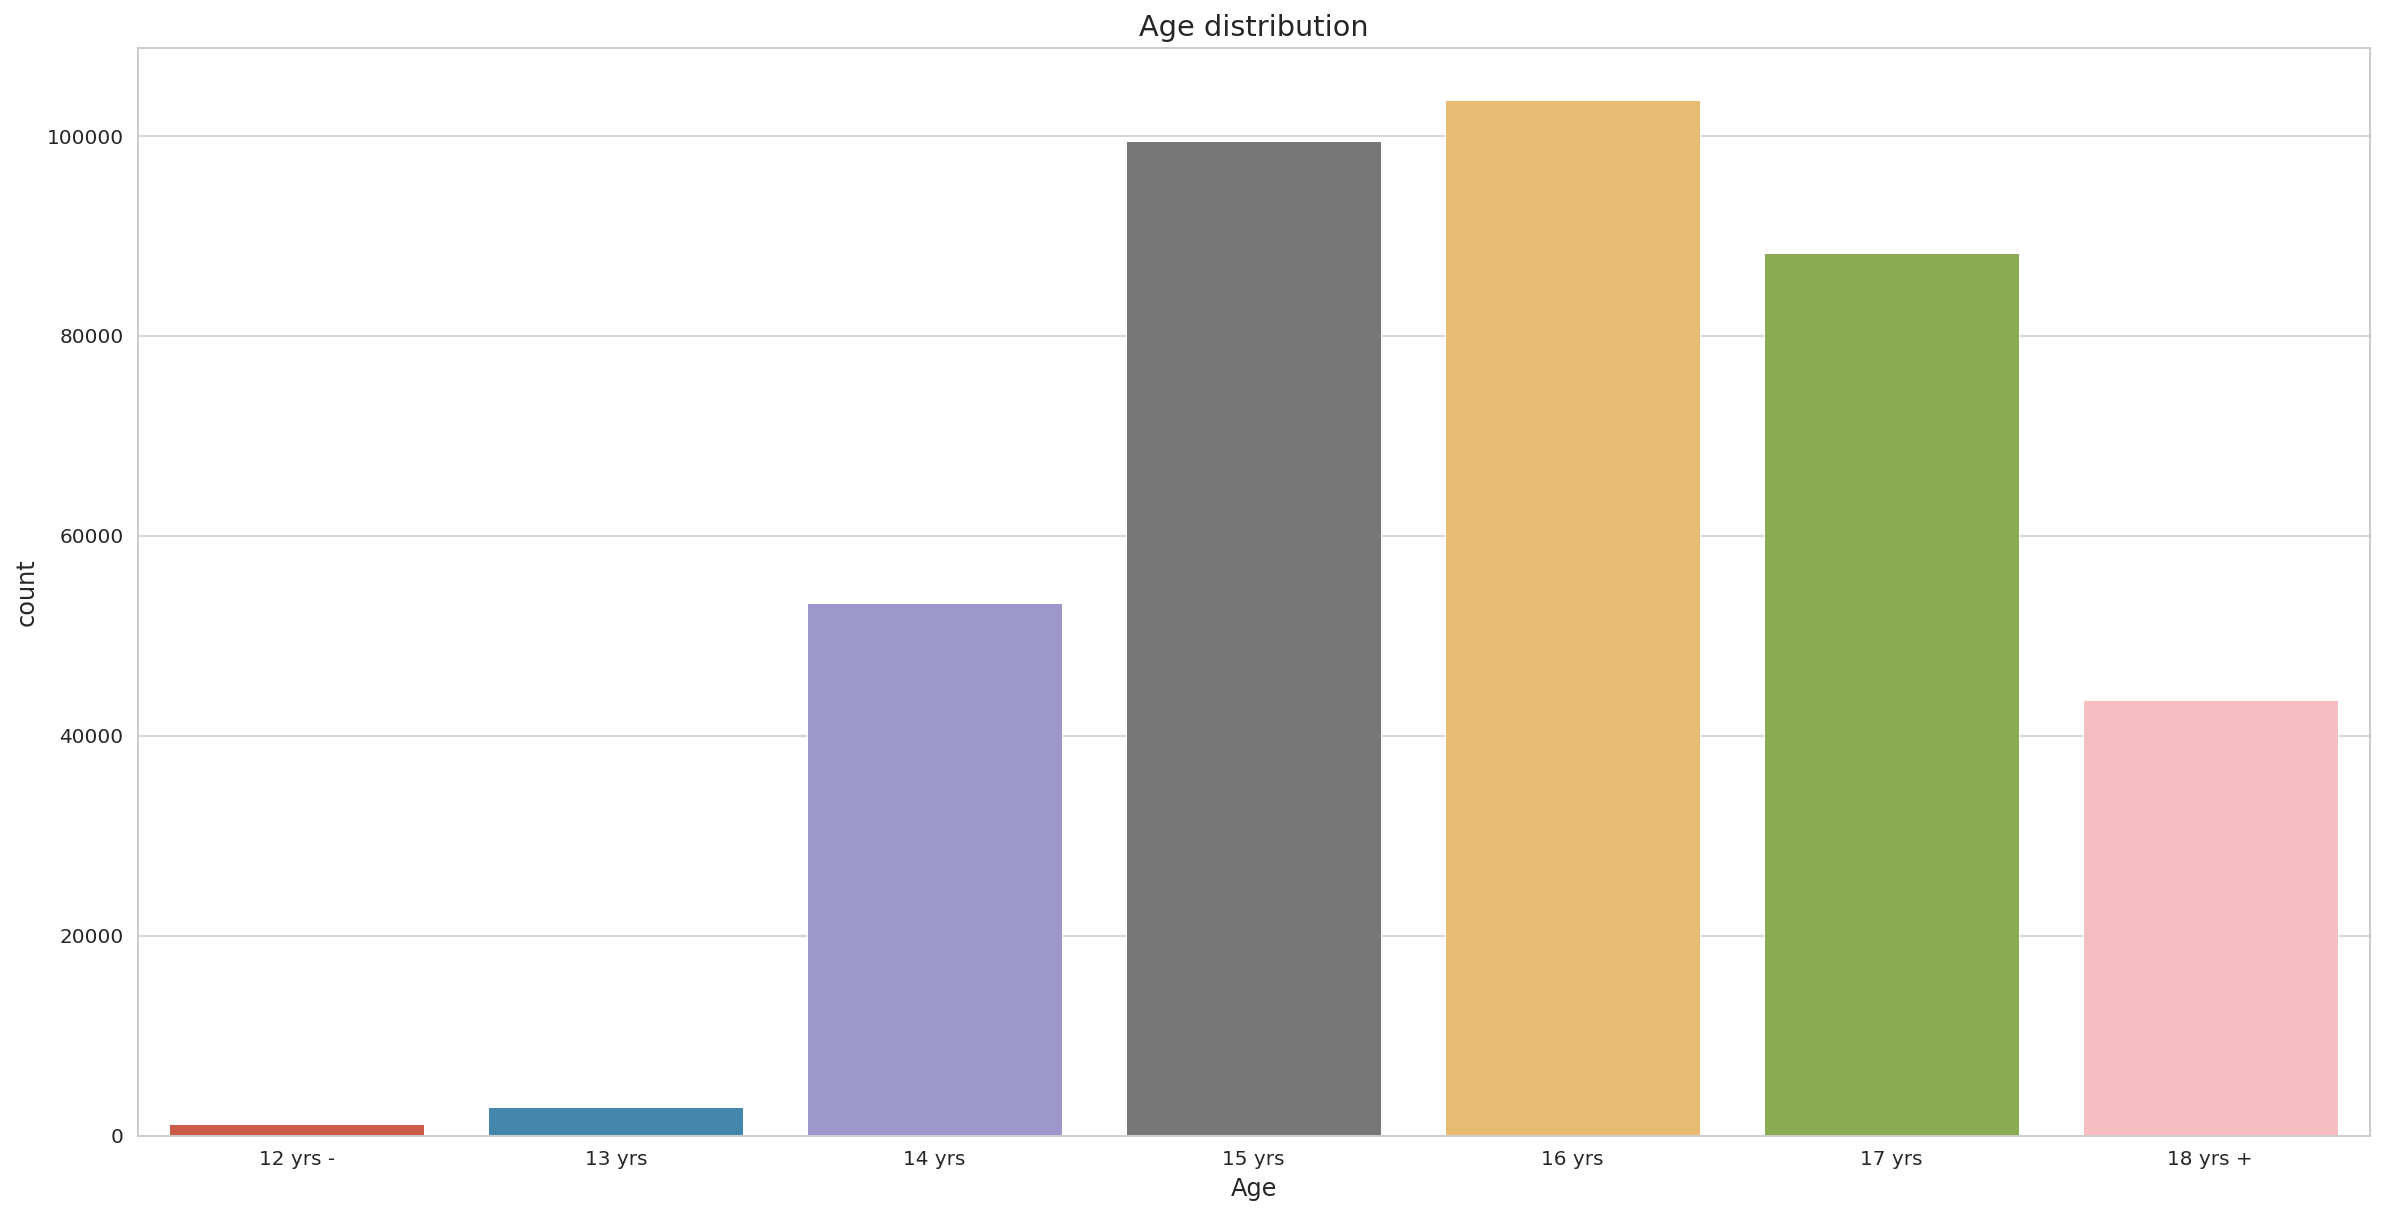

In [7]:
age_dict = {1: '12 yrs -', 2: '13 yrs', 3: '14 yrs', 
           4: '15 yrs', 5: '16 yrs', 6: '17 yrs', 7: '18 yrs +'}
age_labels = [v for k, v in age_dict.items()]

fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(data=df, x='age')
ax.set_xticklabels(labels=age_labels)
ax.set_title('Age distribution')
ax.set_xlabel('Age');

In [8]:
df.year.value_counts()

2011.0    51038
2009.0    50964
2013.0    43482
2007.0    41173
2005.0    39859
2015.0    39716
2003.0    35692
1997.0    18192
2001.0    18052
1995.0    16207
1999.0    15990
1993.0    12650
1991.0    10404
Name: year, dtype: int64

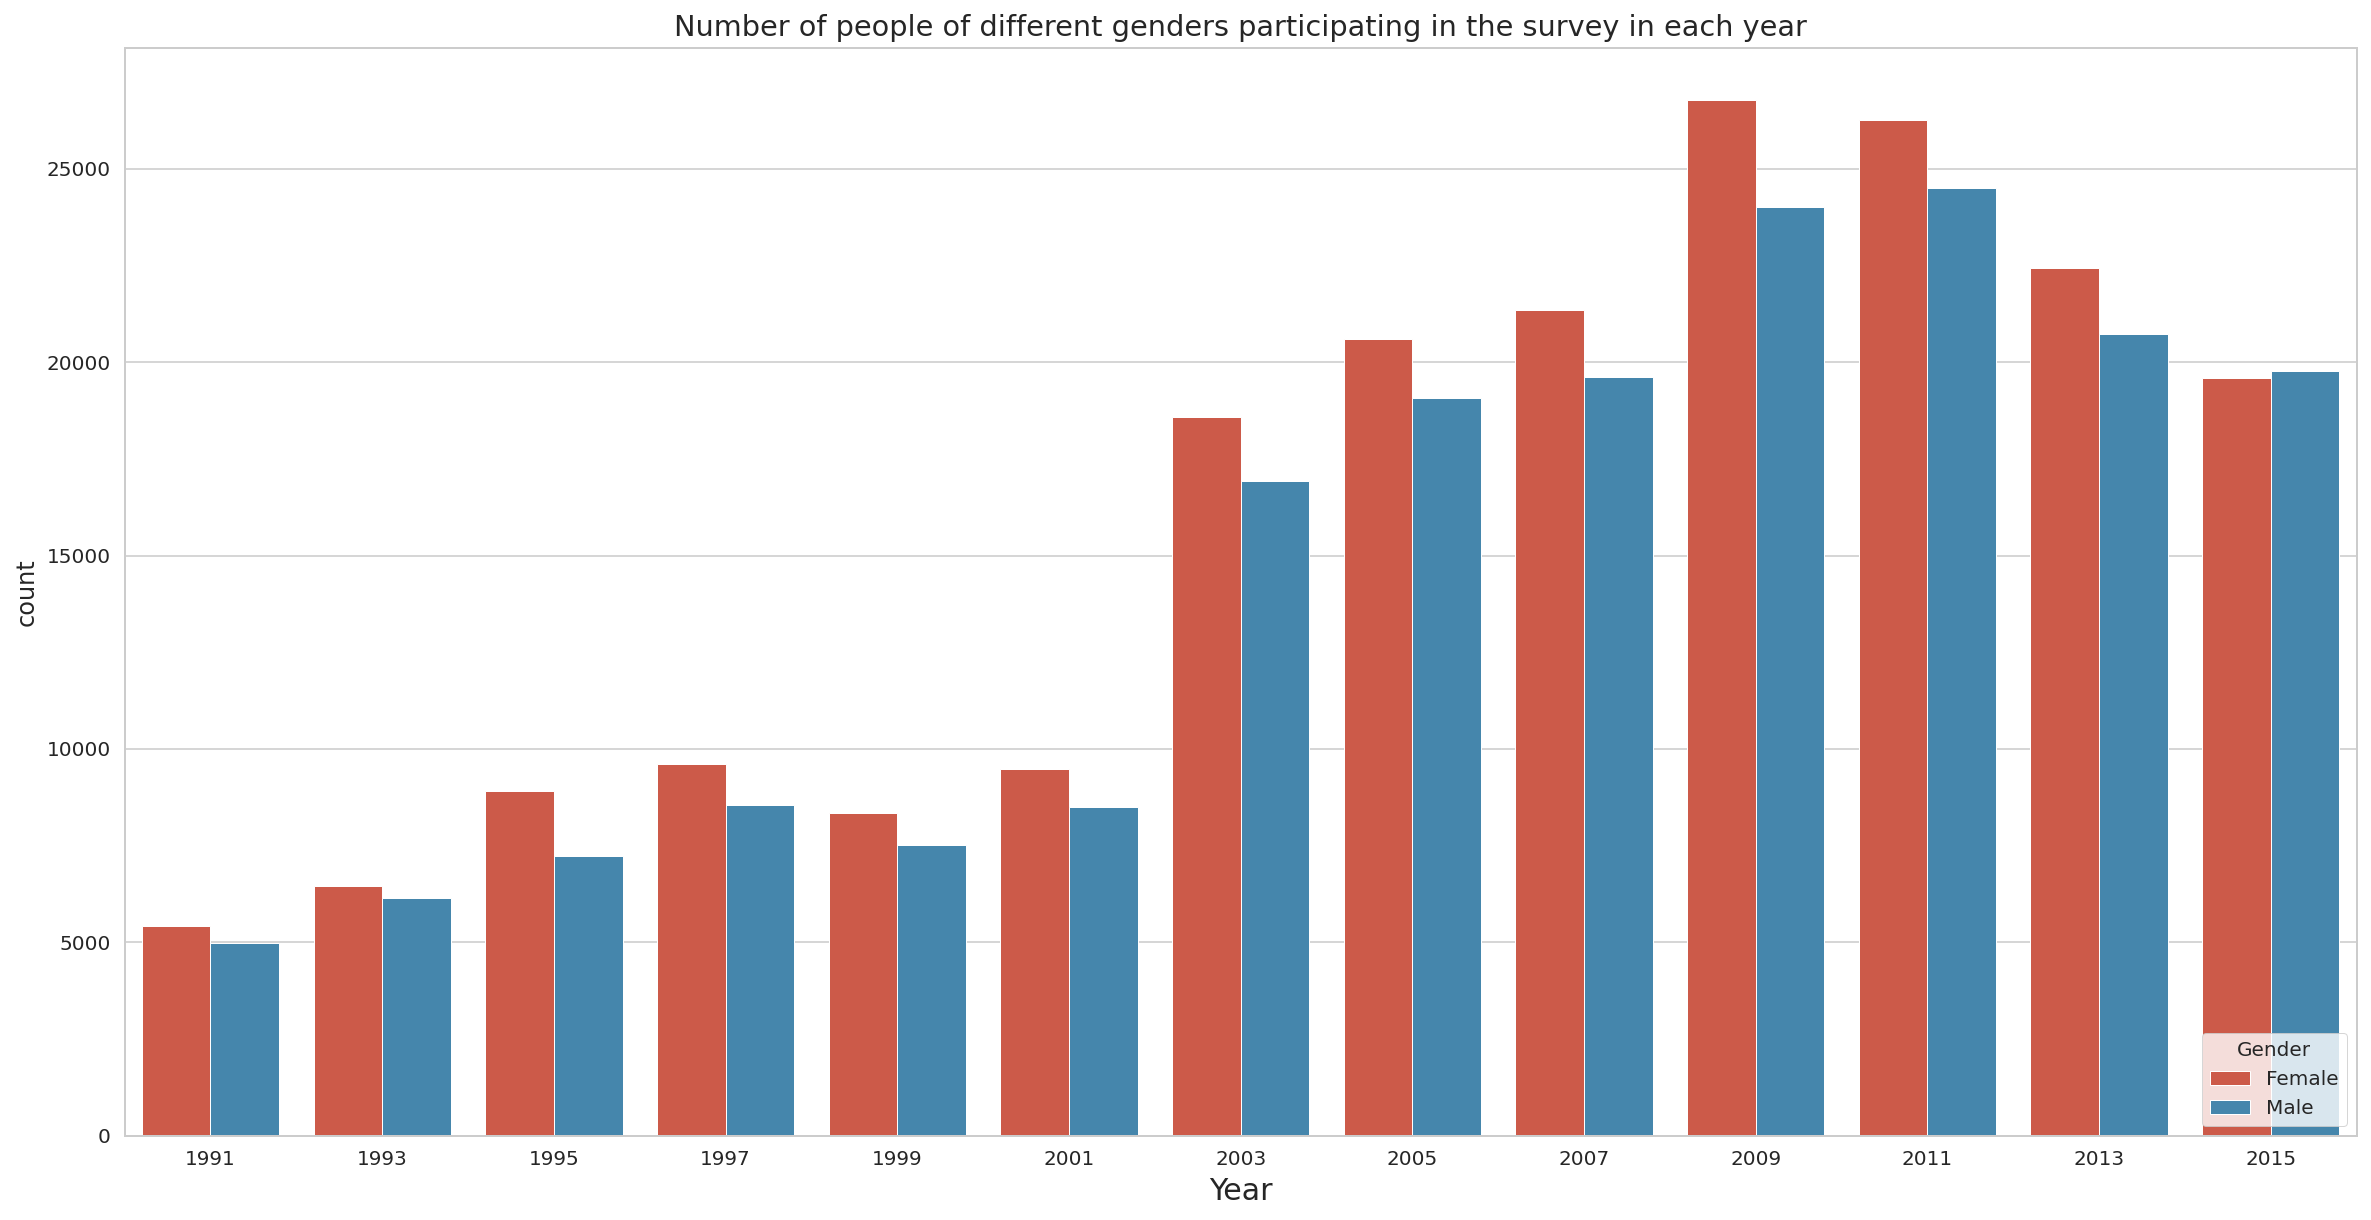

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(data=df, x='year', hue='sex', ax=ax)
ax.set_title('Number of people of different genders participating in the survey in each year')
ax.set_xticklabels(labels=[1991,1993,1995,1997,1999,2001,2003,2005,2007,2009, 2011, 2013, 2015, 2017, 2019])
ax.set_xlabel('Year', fontsize=15)
ax.legend(title='Gender', labels=['Female', 'Male'], loc='lower right');

Text(0.5, 1.0, 'Q25 Felt sad or Hopeless')

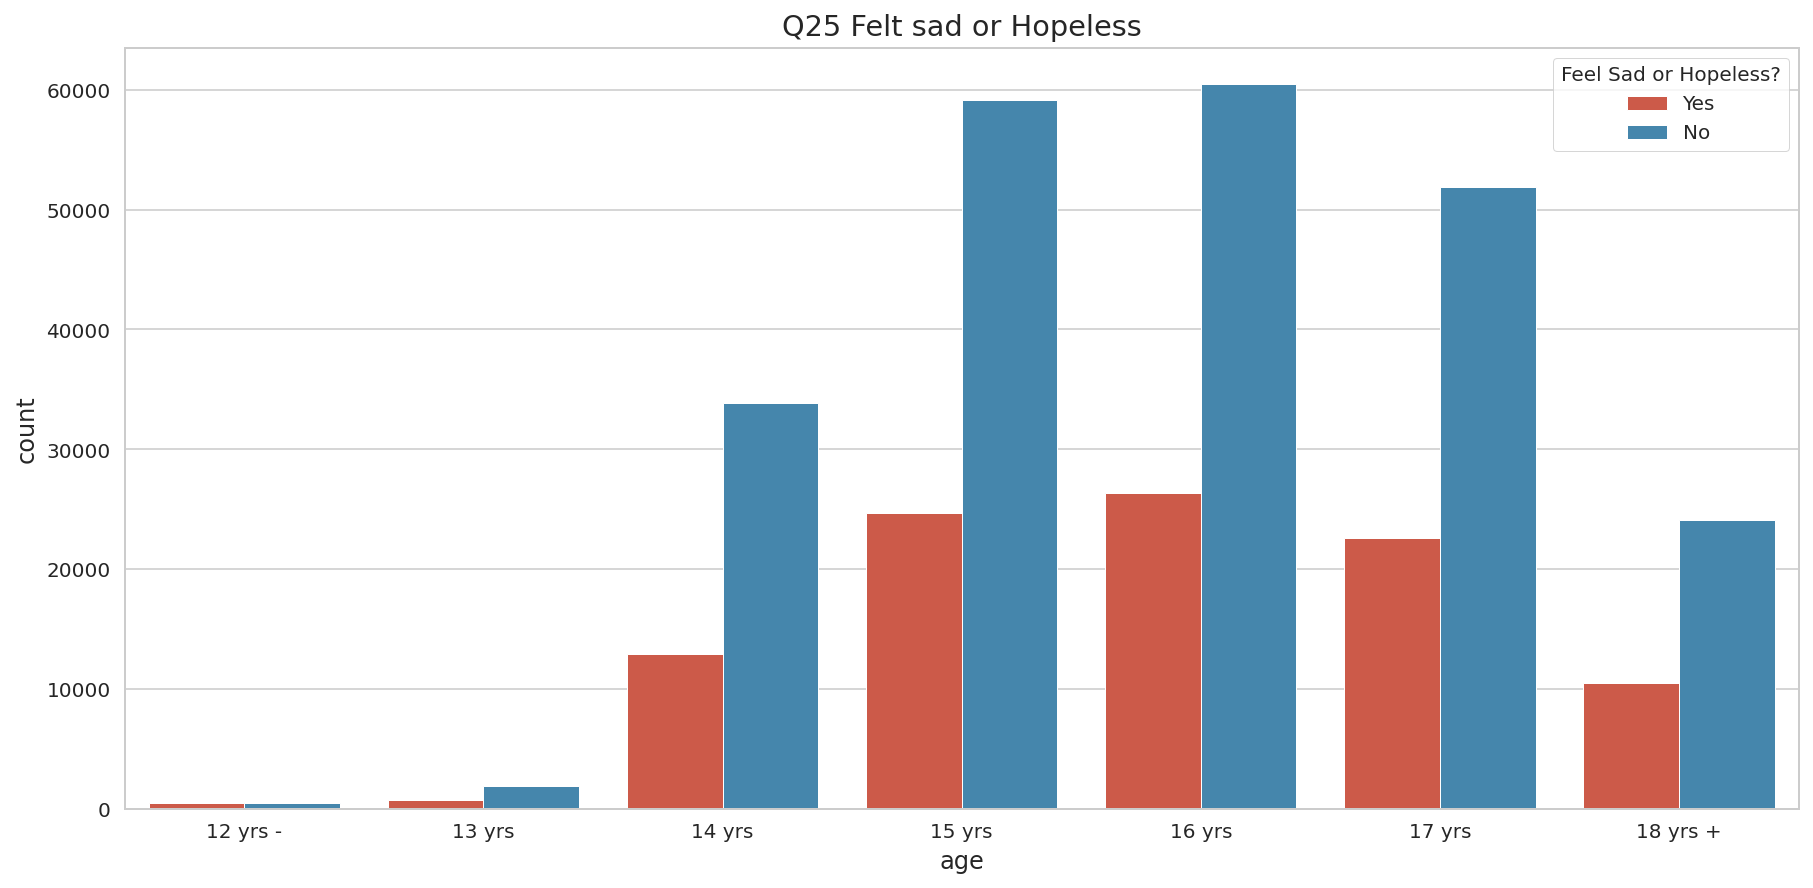

In [10]:
#Q25 During the past 12 months, did you ever feel so sad or hopeless almost every day for two weeks or more in a row that you stopped doing some usual activities?
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.countplot(x=df['age'], hue=df['q25'])
ax.set_xticklabels(labels=age_labels)
ax.legend(title='Feel Sad or Hopeless?', labels=['Yes', 'No']);
ax.set_title('Q25 Felt sad or Hopeless')

# Data Cleaning

In [11]:
df

,sitecode,sitename,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,record,...,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
0,CH,"Chicago, IL (CH)",District,1.0,1991.0,1.0,76.7361,1.0,14.0,3972.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH,"Chicago, IL (CH)",District,1.0,1991.0,1.0,58.4872,1.0,39.0,7364.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CH,"Chicago, IL (CH)",District,1.0,1991.0,1.0,40.1190,1.0,29.0,7365.0,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CH,"Chicago, IL (CH)",District,1.0,1991.0,1.0,72.2433,1.0,28.0,7366.0,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CH,"Chicago, IL (CH)",District,1.0,1991.0,1.0,73.3721,1.0,4.0,9648.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393414,SA,"San Diego, CA (SA)",District,1.0,2015.0,13.0,6.9464,9.0,1.0,899927.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393415,SA,"San Diego, CA (SA)",District,1.0,2015.0,13.0,7.2995,9.0,1.0,899928.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393416,SA,"San Diego, CA (SA)",District,1.0,2015.0,13.0,5.1960,8.0,1.0,899929.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393417,SA,"San Diego, CA (SA)",District,1.0,2015.0,13.0,6.0285,8.0,1.0,899930.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#See what values exist for the attribute q25
df.q25.unique()

array([nan,  1.,  2.])

In [13]:
# By consulting, we know that 2 stands for no, and we change 2 to 0
df.q25.replace(to_replace={2.: 0}, inplace=True)

#### Removing Features

In [14]:
sad_df = df.copy()

sad_df.race4.isnull().sum(), sad_df.race7.isnull().sum()

(9812, 11958)

In [15]:
# Remove features that are not meaningfully related

#It is worth noting that the reason we remove feature race4 here and keep feature race7 is that 
#  race7 can provide more specific information, even though it has more null values

to_drop = ['sitename','year',
'sitecode', 'race4',
 'sitetype',
 'sitetypenum',
 'survyear',
 'weight',
 'stratum',
 'PSU',
 'stheight',
 'stweight',
 'bmipct',
 'qnobese',
 'qnowt',
 'q66', 
 'q65',
 'sexid',
'sexid2',
 'sexpart',
 'sexpart2',
 'qbikehelmet',
 'qdrivemarijuana',
 'qcelldriving',
 'qpropertydamage',
 'qbullyweight',
 'qbullygender',
 'qbullygay',
 'qchokeself',
 'qcigschool',
 'qchewtobschool',
 'qalcoholschool',
 'qtypealcohol2',
 'qhowmarijuana',
 'qmarijuanaschool',
 'qcurrentopioid',
 'qcurrentcocaine',
 'qcurrentheroin',
 'qcurrentmeth',
 'qhallucdrug',
 'qprescription30d',
 'qgenderexp',
 'qtaughtHIV',
 'qtaughtsexed',
 'qtaughtstd',
 'qtaughtcondom',
 'qtaughtbc',
 'qdietpop',
 'qcoffeetea',
 'qsportsdrink',
 'qenergydrink',
 'qsugardrink',
 'qwater',
 'qfastfood',
 'qfoodallergy',
 'qwenthungry',
 'qmusclestrength',
 'qsunscreenuse',
 'qindoortanning',
 'qsunburn',
 'qconcentrating',
 'qcurrentasthma',
 'qwheresleep',
 'qspeakenglish',
 'qtransgender']


In [16]:
sad_df.drop(columns=to_drop, inplace=True)

In [17]:
sad_df

,record,age,sex,grade,race7,bmi,q8,q9,q10,q11,...,q80,q81,q82,q83,q84,q85,q86,q87,q88,q89
0,3972.0,1.0,NaN,1.0,6.0,NaN,1.0,2.0,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7364.0,4.0,NaN,1.0,3.0,NaN,1.0,1.0,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7365.0,4.0,NaN,1.0,6.0,NaN,5.0,5.0,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7366.0,4.0,NaN,2.0,6.0,NaN,1.0,5.0,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9648.0,5.0,NaN,2.0,3.0,NaN,1.0,5.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393414,899927.0,6.0,2.0,NaN,4.0,20.440816,1.0,5.0,6.0,2.0,...,1.0,3.0,4.0,NaN,2.0,NaN,4.0,3.0,1.0,7.0
393415,899928.0,6.0,2.0,4.0,NaN,25.712199,5.0,1.0,2.0,2.0,...,4.0,1.0,1.0,NaN,3.0,NaN,1.0,2.0,7.0,3.0
393416,899929.0,6.0,2.0,4.0,7.0,20.041661,5.0,1.0,2.0,2.0,...,1.0,1.0,3.0,NaN,2.0,NaN,1.0,1.0,3.0,3.0
393417,899930.0,6.0,2.0,3.0,4.0,29.157025,3.0,1.0,1.0,1.0,...,1.0,1.0,2.0,NaN,2.0,NaN,5.0,1.0,2.0,5.0


In [18]:
#Remove Features with High NaNs
pd.set_option("display.max_rows", None, "display.max_columns", None)
sad_df.isnull().sum() / len(sad_df) * 100

record      0.000000
age         0.263332
sex         0.510906
grade       1.071885
race7       3.039507
bmi        21.602414
q8         16.463872
q9         27.787423
q10        80.969145
q11        86.449053
q12         3.647002
q13         5.301727
q14       100.000000
q15         3.381891
q16         3.580915
q17         5.000267
q18        19.993950
q19        33.458221
q20       100.000000
q21        82.135332
q22        80.561945
q23        54.558626
q24        67.238491
q25        15.856377
q26         1.632611
q27        23.369232
q28        16.435912
q29        20.139088
q30        12.014163
q31       100.000000
q32         6.627031
q33        11.425986
q34        94.595584
q35        90.429034
q36       100.000000
q37       100.000000
q38        28.181913
q39       100.000000
q40        11.691606
q41         9.672131
q42       100.000000
q43        85.007587
q44        51.356442
q45        20.582382
q46         4.183072
q47         4.150791
q48        91.017465
q49       100

In [19]:
#delete features with a missing rate greater than 20%
to_drop_nans = [
'q8','q9','q10','q11','q14','q18','q19',
'q20','q21','q22','q23','q24',
'q27','q29','q31','q34','q34',
'q35','q36','q37','q38','q39',
'q42','q43','q44','q45','q48',
'q49','q51','q52','q53','q54',
'q55','q57','q71','q72','q73',
'q74','q75','q76','q77','q78',
'q79','q80','q82','q83','q84',
'q85','q86','q87','q88','q89']

In [20]:
sad_df.drop(columns=to_drop_nans, inplace=True)

In [21]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
sad_df.isnull().sum() / len(sad_df) * 100

record     0.000000
age        0.263332
sex        0.510906
grade      1.071885
race7      3.039507
bmi       21.602414
q12        3.647002
q13        5.301727
q15        3.381891
q16        3.580915
q17        5.000267
q25       15.856377
q26        1.632611
q28       16.435912
q30       12.014163
q32        6.627031
q33       11.425986
q40       11.691606
q41        9.672131
q46        4.183072
q47        4.150791
q50        6.331672
q56       15.616175
q58       13.637623
q59       12.975987
q60       13.319641
q61       13.717436
q62       14.498029
q63       14.531581
q64       15.196012
q67       11.188580
q68        9.238242
q69       21.741451
q70       22.499930
q81       15.234394
dtype: float64

In [22]:
sad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393419 entries, 0 to 393418
Data columns (total 35 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   record  393419 non-null  float64
 1   age     392383 non-null  float64
 2   sex     391409 non-null  float64
 3   grade   389202 non-null  float64
 4   race7   381461 non-null  float64
 5   bmi     308431 non-null  float64
 6   q12     379071 non-null  float64
 7   q13     372561 non-null  float64
 8   q15     380114 non-null  float64
 9   q16     379331 non-null  float64
 10  q17     373747 non-null  float64
 11  q25     331037 non-null  float64
 12  q26     386996 non-null  float64
 13  q28     328757 non-null  float64
 14  q30     346153 non-null  float64
 15  q32     367347 non-null  float64
 16  q33     348467 non-null  float64
 17  q40     347422 non-null  float64
 18  q41     355367 non-null  float64
 19  q46     376962 non-null  float64
 20  q47     377089 non-null  float64
 21  q50     36

In [46]:
# Remove Low Correlated Features
corr = sad_df.corr()
corr

,record,age,sex,grade,race7,bmi,q12,q13,q15,q16,q17,q25,q26,q28,q30,q32,q33,q40,q41,q46,q47,q50,q56,q58,q59,q60,q61,q62,q63,q64,q67,q68,q69,q70,q81
record,1.000000,0.447270,-0.870266,0.409368,-0.012287,0.007137,-0.147972,-0.069714,-0.017950,-0.086685,-0.151182,0.141695,-0.087352,0.020351,-0.031708,0.002865,-0.001212,0.168009,0.019841,0.066950,-0.042864,-0.040068,-0.057817,-0.017867,0.152233,-0.068616,-0.038393,0.030400,0.060280,0.012511,0.106017,-0.126359,-0.059073,-0.023424,-0.115990
age,0.447270,1.000000,0.034711,0.816962,-0.015624,0.113210,0.020902,0.006273,0.005963,-0.010850,-0.045215,0.013117,0.019087,-0.026213,-0.114090,0.083531,0.078795,0.236210,0.111986,0.193230,0.087101,0.028505,-0.006281,-0.251507,0.340300,0.227200,0.201981,0.240543,0.247314,0.213793,-0.002548,-0.000011,0.007317,-0.000320,-0.170305
sex,-0.870266,0.034711,1.000000,-0.003668,0.002318,0.046365,0.173677,0.081665,0.018971,0.088997,0.142808,-0.155546,0.112807,-0.043614,-0.016561,0.038818,0.040298,-0.064283,0.034702,0.026874,0.094705,0.058295,0.061363,-0.110457,0.008653,0.194769,0.148106,0.090168,0.060118,0.096217,-0.121123,0.143749,0.069522,0.026442,0.049638
grade,0.409368,0.816962,-0.003668,1.000000,-0.008844,0.095870,-0.010204,0.001596,-0.014387,-0.017872,-0.088023,-0.000106,0.022180,-0.032032,-0.057878,0.053944,0.047391,0.215595,0.098616,0.171014,0.066661,0.030657,0.000045,-0.191651,0.293225,0.163491,0.151695,0.183908,0.196274,0.166907,0.017352,-0.007700,-0.015434,-0.012994,-0.150380
race7,-0.012287,-0.015624,0.002318,-0.008844,1.000000,-0.027497,0.025683,0.002649,-0.019205,-0.001308,-0.001323,0.007350,-0.030442,-0.005070,-0.082377,0.124073,0.125470,0.111303,0.141900,0.095283,0.071870,0.051159,0.007236,0.019862,0.021410,-0.049047,-0.028868,-0.033611,-0.008231,-0.013186,0.036274,-0.000665,-0.020432,0.025552,-0.036807
bmi,0.007137,0.113210,0.046365,0.095870,-0.027497,1.000000,0.049271,0.033977,0.041629,0.038570,0.049362,0.028257,-0.035016,0.044529,-0.060254,0.027773,0.029725,0.041572,0.037777,0.057962,0.040948,0.031544,0.030702,-0.080399,0.056470,0.088689,0.072088,0.073779,0.081570,0.065892,0.498342,-0.298750,0.009053,-0.002587,-0.017426
q12,-0.147972,0.020902,0.173677,-0.010204,0.025683,0.049271,1.000000,0.650976,0.198871,0.316150,0.416830,0.076849,-0.114800,0.188484,-0.189471,0.243808,0.256135,0.047954,0.334201,0.164219,0.308050,0.254794,0.229865,-0.215567,0.104412,0.287319,0.300644,0.161151,0.208016,0.183513,-0.018666,0.029271,0.063827,0.037398,-0.013508
q13,-0.069714,0.006273,0.081665,0.001596,0.002649,0.033977,0.650976,1.000000,0.210670,0.340547,0.323873,0.072198,-0.117324,0.224375,-0.131450,0.211530,0.232930,0.014091,0.270327,0.098314,0.244276,0.271993,0.270666,-0.138784,0.057321,0.198113,0.233741,0.091985,0.150333,0.117565,-0.004258,0.019198,0.039095,0.016174,-0.010026
q15,-0.017950,0.005963,0.018971,-0.014387,-0.019205,0.041629,0.198871,0.210670,1.000000,0.365454,0.225498,0.142910,-0.136916,0.251566,-0.090941,0.147608,0.167018,0.007825,0.165732,0.047909,0.139461,0.209392,0.219348,-0.097133,0.049032,0.122997,0.158964,0.066875,0.106656,0.082131,-0.017678,-0.013460,0.034324,0.017692,-0.014819
q16,-0.086685,-0.010850,0.088997,-0.017872,-0.001308,0.038570,0.316150,0.340547,0.365454,1.000000,0.360534,0.115747,-0.144307,0.299419,-0.111676,0.202970,0.231515,-0.005924,0.252568,0.064194,0.215284,0.314238,0.320998,-0.121061,0.037727,0.181812,0.230355,0.073363,0.133064,0.106325,-0.012319,0.013511,0.037879,0.027463,-0.012749


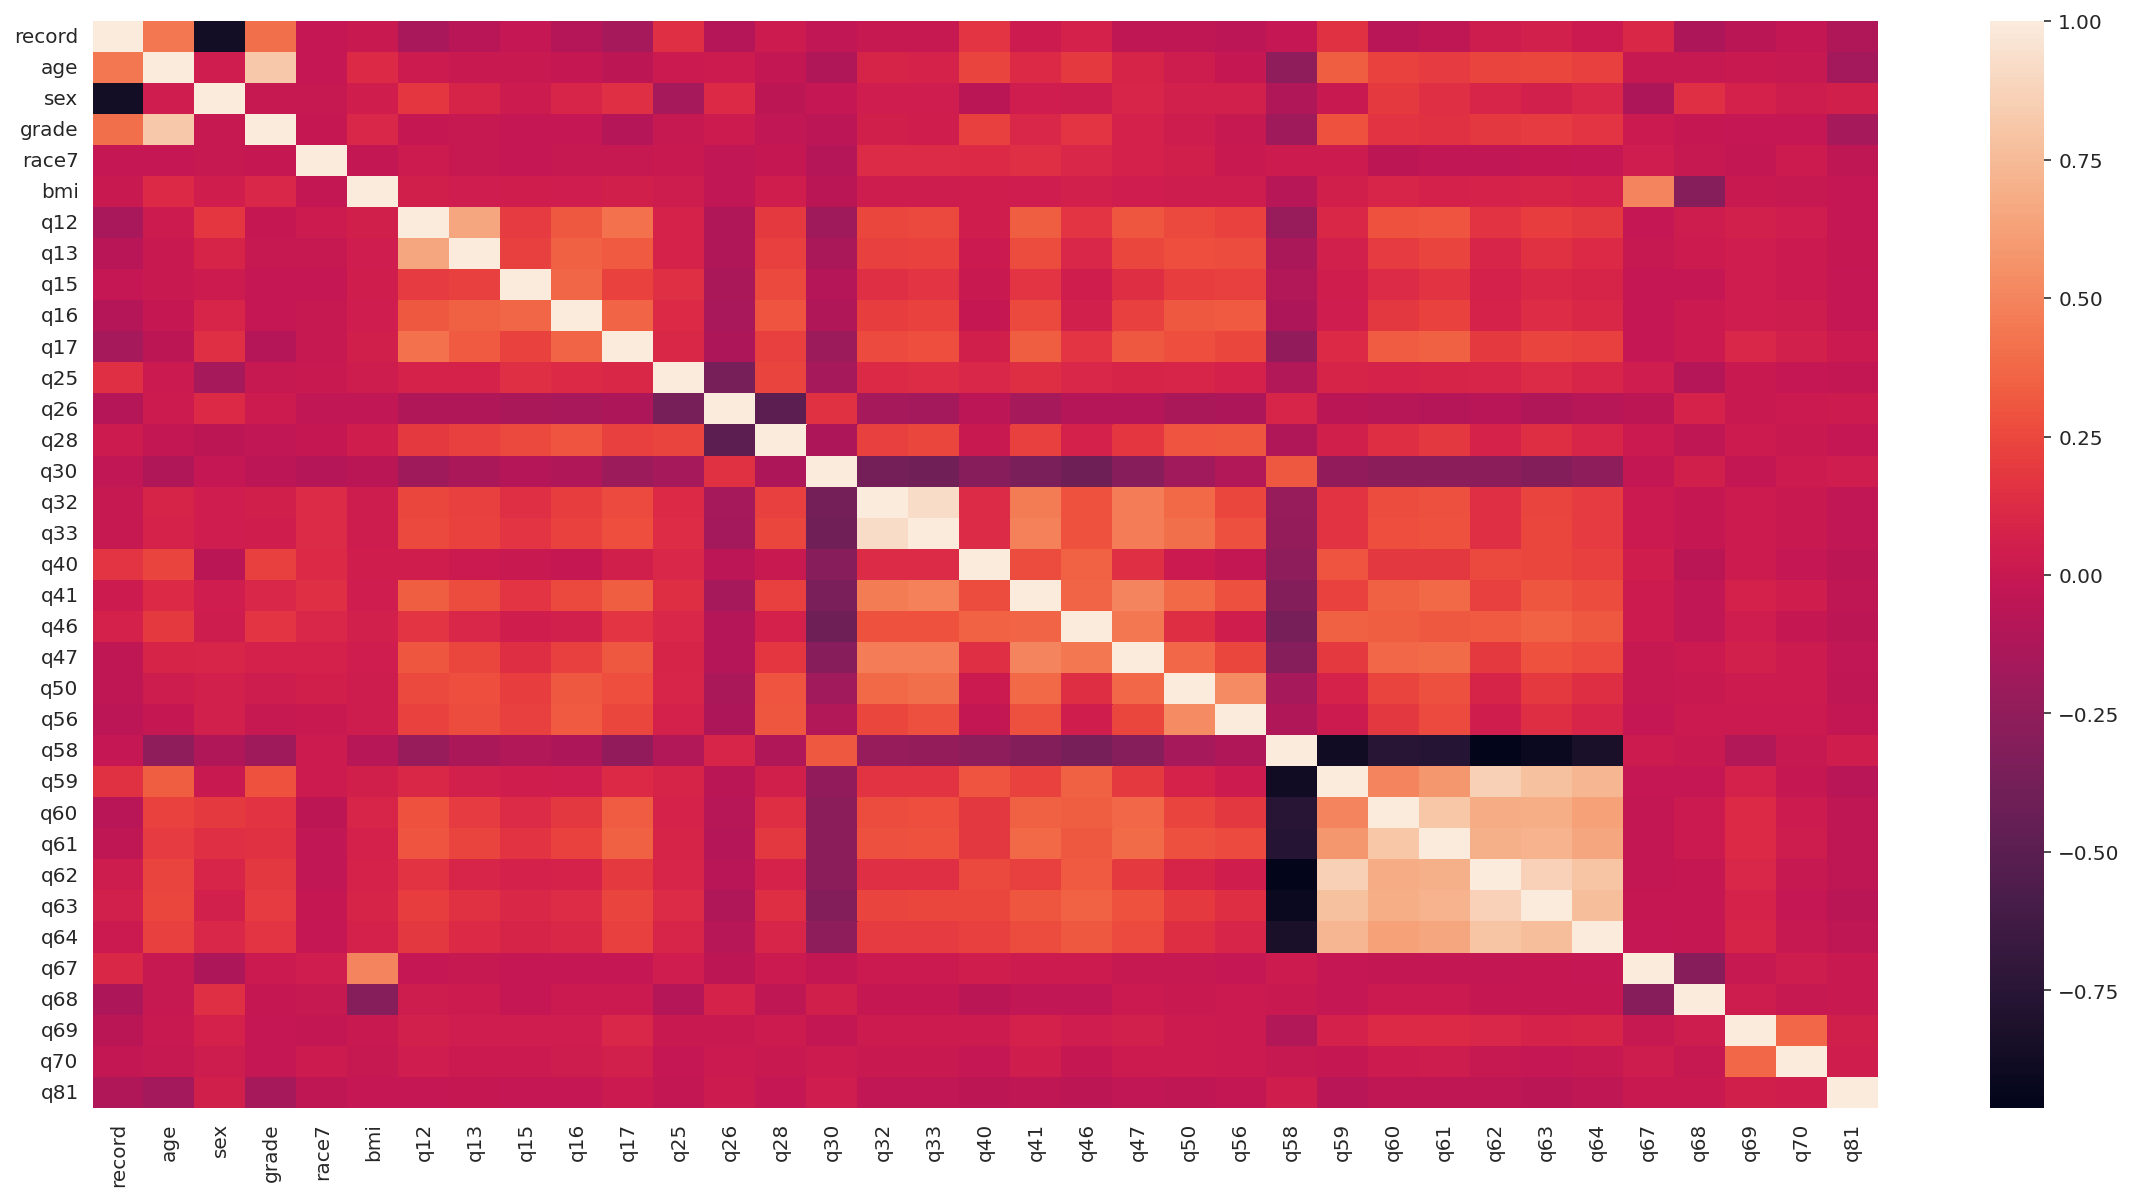

In [24]:
# Draw the heatmap 
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr)

In [25]:
# Look at the correlation between feature q25 and other features
corr.q25.sort_values(ascending=False)

q25       1.000000
q28       0.240408
q15       0.142910
record    0.141695
q41       0.137708
q33       0.125976
q63       0.124566
q32       0.117594
q16       0.115747
q17       0.109147
q46       0.100870
q40       0.097187
q50       0.092616
q62       0.088587
q64       0.087600
q61       0.086785
q59       0.086580
q47       0.082075
q12       0.076849
q60       0.074836
q13       0.072198
q56       0.069966
q67       0.036215
bmi       0.028257
age       0.013117
q69       0.009194
race7     0.007350
grade    -0.000106
q70      -0.014060
q81      -0.026674
q68      -0.092686
q58      -0.103453
q30      -0.152800
sex      -0.155546
q26      -0.366796
Name: q25, dtype: float64

Here, we could remove features that have an absolute value of less than 0.01 with the q25 correlation coefficient, but we don't do that here because it is possible that they are indirectly correlated

In [26]:
#If the attribute q25 of a row is a missing value, we should delete the row
sad = sad_df.dropna(subset=['q25'])

In [27]:
sad.q25.unique()

array([1., 0.])

In [28]:
cols = sad.columns.tolist()
for col in cols: 
    sad[col]=sad[col].fillna(sad[col].mode()[0]) #Other missing values, fill in the plural

<ipython-input-28-a880d8fbb194>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sad[col]=sad[col].fillna(sad[col].mode()[0]) #Other missing values, fill in the plural


In [29]:
sad.isnull().sum()

record    0
age       0
sex       0
grade     0
race7     0
bmi       0
q12       0
q13       0
q15       0
q16       0
q17       0
q25       0
q26       0
q28       0
q30       0
q32       0
q33       0
q40       0
q41       0
q46       0
q47       0
q50       0
q56       0
q58       0
q59       0
q60       0
q61       0
q62       0
q63       0
q64       0
q67       0
q68       0
q69       0
q70       0
q81       0
dtype: int64

# Modeling

The significance of the following modeling and analysis is that we have "streamlined" the questionnaire by cleaning the data in the previous section, in other words, we have selected the set of variables that are most relevant to adolescent mental health problems, but this, of course, falls short of our goal of predicting whether a person has a potential mental health problem. We mainly used multiple models for modeling and analysis to find the best model.

In [30]:
sad.head()

,record,age,sex,grade,race7,bmi,q12,q13,q15,q16,q17,q25,q26,q28,q30,q32,q33,q40,q41,q46,q47,q50,q56,q58,q59,q60,q61,q62,q63,q64,q67,q68,q69,q70,q81
57453,120.0,5.0,1.0,1.0,4.0,20.893566,2.0,2.0,1.0,8.0,3.0,1.0,2.0,1.0,1.0,7.0,4.0,2.0,6.0,5.0,1.0,5.0,3.0,1.0,6.0,5.0,3.0,3.0,3.0,2.0,4.0,3.0,5.0,3.0,3.0
57454,121.0,5.0,1.0,1.0,4.0,38.321396,1.0,1.0,1.0,1.0,3.0,0.0,2.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,7.0,1.0
57455,122.0,5.0,1.0,1.0,4.0,20.893566,5.0,5.0,1.0,1.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,4.0,3.0,3.0,2.0,4.0,3.0,4.0,2.0,3.0,6.0
57456,123.0,5.0,1.0,1.0,4.0,20.893566,1.0,1.0,1.0,3.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,5.0,2.0,3.0,2.0,2.0,4.0,3.0,2.0,5.0,4.0,1.0
57458,125.0,5.0,1.0,1.0,4.0,20.893566,1.0,1.0,1.0,2.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0,6.0,3.0,5.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,2.0,4.0,3.0,1.0,5.0,3.0,6.0


In [31]:
X = sad.drop(columns=['q25'])
y=sad['q25']

In [32]:
X.shape, y.shape

((331037, 34), (331037,))

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
# scores = cross_val_score(rf, X_train, y_train, cv=10)
# print(scores)


In [35]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [36]:
preds = rf.predict(X_test)

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

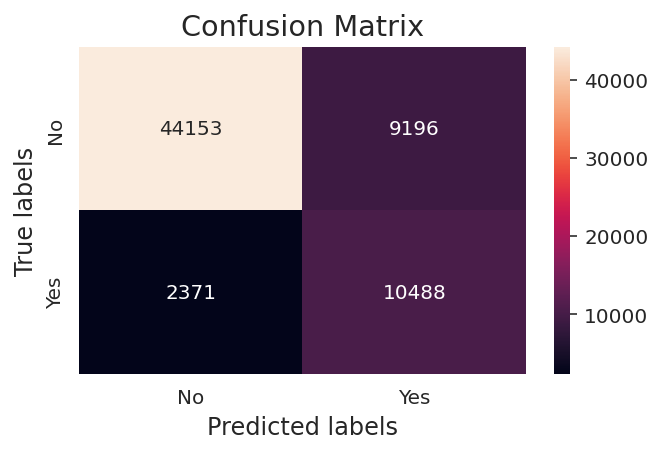

In [37]:
cm = confusion_matrix(preds, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

In [38]:
print(classification_report(preds,y_test, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.95      0.83      0.88     53349
         Yes       0.53      0.82      0.64     12859

    accuracy                           0.83     66208
   macro avg       0.74      0.82      0.76     66208
weighted avg       0.87      0.83      0.84     66208



In [39]:
from sklearn.linear_model import LogisticRegression
model_logReg = LogisticRegression()
model_logReg.fit(X_train, y_train)
log_pred = model_logReg.predict(X_test)


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

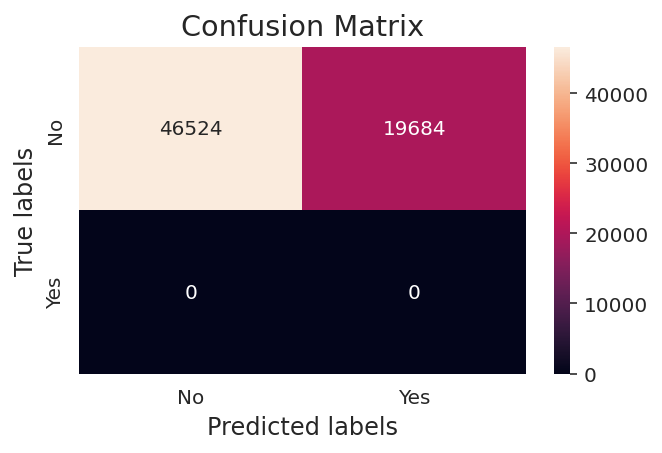

In [40]:
cm = confusion_matrix(log_pred, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

In [41]:
print(classification_report(y_test, log_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.70      1.00      0.83     46524
         Yes       0.00      0.00      0.00     19684

    accuracy                           0.70     66208
   macro avg       0.35      0.50      0.41     66208
weighted avg       0.49      0.70      0.58     66208



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
import xgboost as xgb
from xgboost import XGBRegressor
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)
xgb_pred = model_xgb.predict(X_test)

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

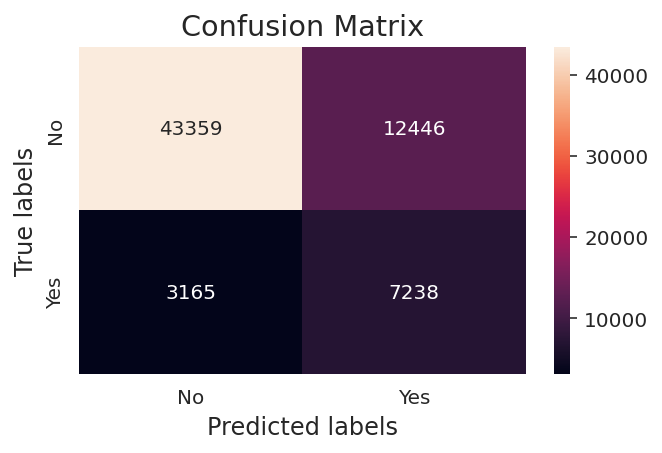

In [43]:
cm = confusion_matrix(xgb_pred, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

In [44]:
print(classification_report(y_test, xgb_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.78      0.93      0.85     46524
         Yes       0.70      0.37      0.48     19684

    accuracy                           0.76     66208
   macro avg       0.74      0.65      0.66     66208
weighted avg       0.75      0.76      0.74     66208



Here, we use three models: random forest, logistic regression, and xgboost, and by comparing them we find that random forest has the highest accuracy and other performance indicators are superior. This was also expected at first, because I think our variables are almost all dichotomous variables, which is perfect for constructing decision trees, as the random forest model should become the model of choice for predicting adolescent mental health problems in the future.